In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from predcontrol_sf.control import User, Control
import predcontrol_sf.value_curves as vc
from predcontrol_sf.data_loader import load_data_bom_aus
from pathlib import Path


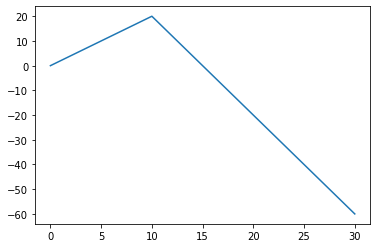

In [2]:
influx = np.linspace(0,30,100)
plt.plot(influx, [vc.value_curve_farmer_1(i) for i in influx])

In [10]:
np.copy([1,2,3])

array([1, 2, 3])

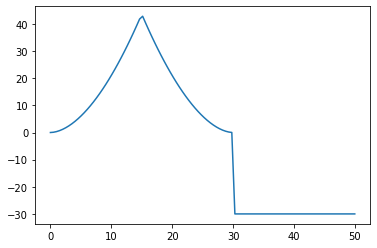

In [3]:
influx = np.linspace(0,50,100)
plt.plot(influx, [vc.value_curve_farmer_2(i) for i in influx])

## Make users

In [4]:
user1 = User(vc.value_curve_farmer_1, discharge_curve=vc.discharge_curve_farmer_1)
user2 = User(vc.value_curve_farmer_2)

In [5]:
ctrl = Control([user1, user2])

In [6]:
ctrl.return_combined_value(1, [None, 10], [0.5, None])

25.205905040672718

In [7]:
data_folder = Path(r"C:\Users\sgnodde\Documents\data\data_murray_boundary_bend")
bb_discharge = load_data_bom_aus(data_folder / 'bb_discharge.csv')
level = load_data_bom_aus(data_folder / 'bb_level.csv')

<AxesSubplot:xlabel='date'>

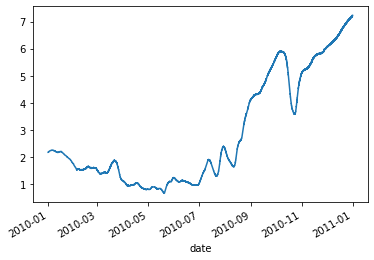

In [8]:
level['Value']['2010'].plot()


In [9]:
weir_setting = 3 # eerst hele jaar vast

ctrl.return_combined_value(level['Value']['2010'], [None, 10], [weir_setting, None])

date
2010-01-01 00:00:00+10:00           NaN
2010-01-01 04:00:00+10:00           NaN
2010-01-01 06:30:00+10:00           NaN
2010-01-01 08:00:00+10:00           NaN
2010-01-01 12:00:00+10:00           NaN
                                ...    
2010-12-31 22:45:00+10:00   -122.567146
2010-12-31 23:00:00+10:00   -123.148442
2010-12-31 23:15:00+10:00   -123.657530
2010-12-31 23:30:00+10:00   -123.512033
2010-12-31 23:45:00+10:00   -124.458377
Name: Value, Length: 32168, dtype: float64

<AxesSubplot:xlabel='date'>

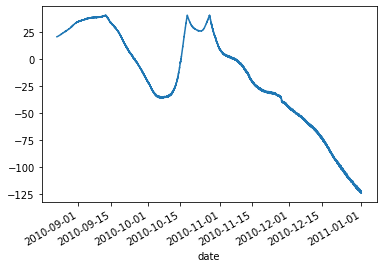

In [10]:
ctrl.return_combined_value(level['Value']['2010'], [None, 10], [weir_setting, None]).plot()

In [16]:
testlist = [1,2,3]
testlist[testlist == 2] 

1

In [19]:
np.array(1)[0]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed